In [1]:
import sys
sys.path.append("/scratch/mz2476/DL/project/")

# from modelzoo import encoder

# from ssl_project.ssl_ideas.model import ShuffleAndLearnModel
from ssl_project.utils import to_np
import numpy as np
import torch
import matplotlib.pyplot as plt

# import pytorch_lightning as pl 
# from argparse import Namespace

# from torch.utils.data import DataLoader

# from pl_modules import VariationalAutoEncoder, AutoEncoder, MMDVariationalAutoEncoder
# from argparse import Namespace
# import pytorch_lightning as pl
# from pytorch_lightning.callbacks import ModelCheckpoint


# from ssl_project.paths import *

from ssl_project.utils import compute_ats_bounding_boxes, compute_ats_bounding_boxes_NEW
from data_helper import LabeledDataset

from ssl_project.data_loaders.plot_utils import plot_bb
from bb_utils import *

In [2]:
data = LabeledDataset(
    image_folder="../data/",
    annotation_file="../data/annotation.csv",
    scene_index=np.array([131, 132, 133])
)

In [3]:
targ_bbs = data[39][1]["bounding_box"]

# Check new func for compute_ats_bounding_boxes works same

In [4]:
# for i in range(100):
#     targ_bbs = data[i][1]["bounding_box"]
#     assert (compute_ats_bounding_boxes(targ_bbs[:10],targ_bbs) 
#             - compute_ats_bounding_boxes_NEW(targ_bbs[:10],targ_bbs)) < 1e-6

In [5]:
# print(compute_ats_bounding_boxes(targ_bbs[:10],targ_bbs))
# print(compute_ats_bounding_boxes_NEW(targ_bbs[:10],targ_bbs))

In [4]:
map_NN = np.zeros((800, 800))

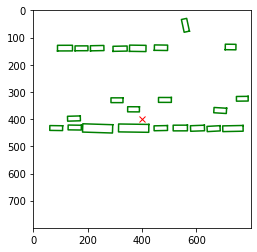

In [5]:
plot_bb(map_NN, targ_bbs)

# Simple strategy: alwars predicting line of cars

In [4]:
grid_bbs = []

len_x, len_y = 50., 25.
offset_x, from_y, to_y = 20., 420., 440 
for x_start in np.arange(offset_x, 800 - offset_x, len_x):
    for y_start in np.arange(from_y, to_y, len_y):
        bb_24 = torch.Tensor([
            [x_start + len_x, x_start + len_x, x_start, x_start],
            [y_start + len_y, y_start, y_start + len_y, y_start],
        ])
        grid_bbs.append(bb_24)
        
grid_bbs_k24 = torch.stack(grid_bbs)

In [5]:
bb_space_bbs_k24 = convert_to_bb_space(grid_bbs_k24, axis=-2)

In [7]:
grid_bbs_k24

tensor([[[ 70.,  70.,  20.,  20.],
         [445., 420., 445., 420.]],

        [[120., 120.,  70.,  70.],
         [445., 420., 445., 420.]],

        [[170., 170., 120., 120.],
         [445., 420., 445., 420.]],

        [[220., 220., 170., 170.],
         [445., 420., 445., 420.]],

        [[270., 270., 220., 220.],
         [445., 420., 445., 420.]],

        [[320., 320., 270., 270.],
         [445., 420., 445., 420.]],

        [[370., 370., 320., 320.],
         [445., 420., 445., 420.]],

        [[420., 420., 370., 370.],
         [445., 420., 445., 420.]],

        [[470., 470., 420., 420.],
         [445., 420., 445., 420.]],

        [[520., 520., 470., 470.],
         [445., 420., 445., 420.]],

        [[570., 570., 520., 520.],
         [445., 420., 445., 420.]],

        [[620., 620., 570., 570.],
         [445., 420., 445., 420.]],

        [[670., 670., 620., 620.],
         [445., 420., 445., 420.]],

        [[720., 720., 670., 670.],
         [445., 420., 445., 4

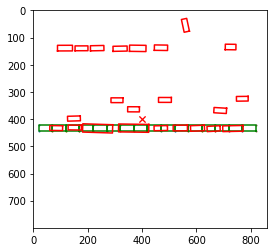

In [8]:
fig, axis= plt.subplots(1, 1)

for bb_24 in grid_bbs_k24:
    plt.scatter(bb_24[0], bb_24[1], s=1)
    
    
plot_bb(map_NN, bb_space_bbs_k24, axis=axis)
plot_bb(map_NN, targ_bbs, axis=axis, color='r')

In [11]:
# scores = []
# for idx in range(len(data)):
#     scores.append(
#         compute_ats_bounding_boxes_NEW(
#             data[idx][1]["bounding_box"], 
#            bb_space_bbs_k24
#         )
#     )

In [12]:
# torch.stack(scores).mean()

tensor(0.0108)

# Add postprocessing for bbs

In [11]:
# def _generate_random_bbs_of_fixed_car_size(k, size_xy=(40, 20)):
#     random_k2 = torch.Tensor(np.random.randint(0, 800, size=(k, 2)).astype(float))
#     random_bbs_k24 = torch.zeros(k, 2, 4)
#     random_bbs_k24 += random_k2[..., None]

#     # shift_24 = torch.Tensor(np.random.randint(0, 40, size=(2, 4)).astype(float))
#     shift_24 = torch.Tensor([
#         [0, 0, -size_xy[0], -size_xy[0]],
#         [0, -size_xy[1], 0, -size_xy[1]]
#     ]).float()
#     random_bbs_k24 += shift_24[None]
#     return random_bbs_k24

# def generate_random_bbs(k):
#     random_bbs_k24 = []
#     for _ in range(k):
#         x, y = random.randint(2, 200), random.randint(2, 20)
#         random_bbs_k24.append(_generate_random_bbs_of_fixed_car_size(1, (x, y)))
#     return torch.cat(random_bbs_k24)
    

# # random_bbs_k24[:, 0, ]
# # plot_bb(map_NN, xx, color='r')

In [12]:
generate_random_bbs(7).shape

torch.Size([7, 2, 4])

In [13]:
random_bbs_k24 = generate_random_bbs(100)

In [14]:
from importlib import reload
import bb_utils
reload(bb_utils)

from bb_utils import *

In [15]:
pipe = ProcessSegmentationMaps()

In [16]:
splitted_bbs_k24 = pipe.transform(random_bbs_k24, input_type="bb")

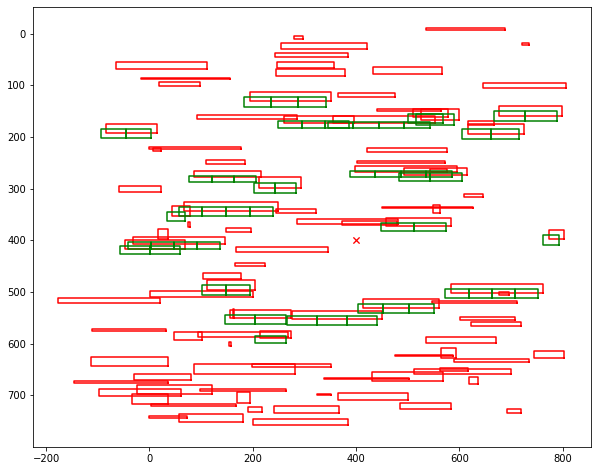

In [17]:
fig, axis= plt.subplots(1, 1, figsize=(10, 10))

# for bb_24 in grid_bbs_k24:
#     plt.scatter(bb_24[0], bb_24[1], s=1)
    
    
# plot_bb(map_NN, bb_space_bbs_k24, axis=axis)
plot_bb(map_NN, convert_to_bb_space(random_bbs_k24, axis=-2) + 1, axis=axis, color='r')
plot_bb(map_NN, convert_to_bb_space(splitted_bbs_k24, axis=-2), axis=axis, color='g')


# Testing `ProcessSegmentationMaps` class

In [18]:
import cv2

In [31]:
segm_map_NN = torch.zeros((800, 800))
segm_map_NN[420:490, 60:80] = 1
segm_map_NN[420:490, 270:280] = 1
segm_map_NN[370:390, 350:380] = 1
segm_map_NN[470:495, 350:390] = 1

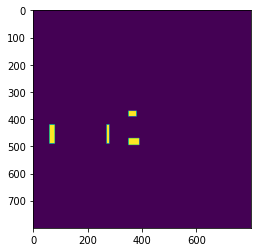

In [32]:
plt.imshow(segm_map_NN)

In [33]:
bbs_k24 = pipe.transform(segm_map_NN, input_type="segm")

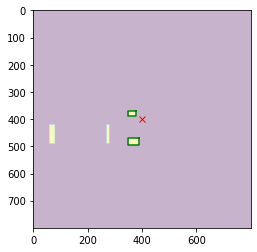

In [34]:
fig, axis= plt.subplots(1, 1)
plot_bb(map_NN, convert_to_bb_space(bbs_k24, axis=-2), axis=axis, color='g')
axis.imshow(segm_map_NN, alpha=0.3)